<a href="https://colab.research.google.com/github/shreyaaishi/ASL-Translator/blob/main/ImagePreprocessingTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis
### Cloning ASL-Translator Repostiory
The images used for this tutorial are located withn our project repostory, named ASL-Translator. To access them, we will clone the repository using the following command. Once it's run, you should see the directory on the left hand side under the Files section.

In [1]:
!git clone https://github.com/shreyaaishi/ASL-Translator.git

Cloning into 'ASL-Translator'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (181/181), done.
remote: Total 185 (delta 4), reused 173 (delta 1), pack-reused 0
Receiving objects: 100% (185/185), 7.01 MiB | 34.01 MiB/s, done.
Resolving deltas: 100% (4/4), done.


### Importing Dataset
Importing libraries is a crucial step for any DS/ML-related project. Using the [os](https://docs.python.org/3/library/os.path.html) Python module, we can interact with the local file directory system. The [glob](https://docs.python.org/3/library/glob.html) Python module allows us to efficiently query through the file names in the Animal folder. It follows a simpler version of standard RegEx:
* Asterisk (*): Matches zero or more characters
* Question Mark (?) Matches exactly one character

In [2]:
# Import necessary libraries
import os
import glob 
from skimage import io, color, morphology
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import random 

# Define file path of folder containing all the lion photos
DATASET_PATH = 'ASL-Translator/Tutorials/ImagePreprocessing/Animals'
class_labels = ['Cheetah', 'Jaguar', 'Leopard', 'Lion', 'Tiger'] 
lion_path = os.path.join(DATASET_PATH, class_labels[3], '*')
# Returns list of file names that follow the convention set by lion_path
lion_path = glob.glob(lion_path)

"""data = pd.DataFrame([])
   for label in class_labels:
   path = os.path.join(DATASET_PATH, label, "*")
   path = pd.Series(glob.glob(path), name=label)
   data = data.append(path)
   data.head() """

'data = pd.DataFrame([])\n   for label in class_labels:\n   path = os.path.join(DATASET_PATH, label, "*")\n   path = pd.Series(glob.glob(path), name=label)\n   data = data.append(path)\n   data.head() '

### Visualizing Data
Digital images are represented as a grid of pixels mirroring a coordinate system similar to the Cartesian coordinate system. The main difference is that the y-axis goes in the opposite direction. In color images, the value at each pixel can be represented by the intensity values or red, green, and blue.
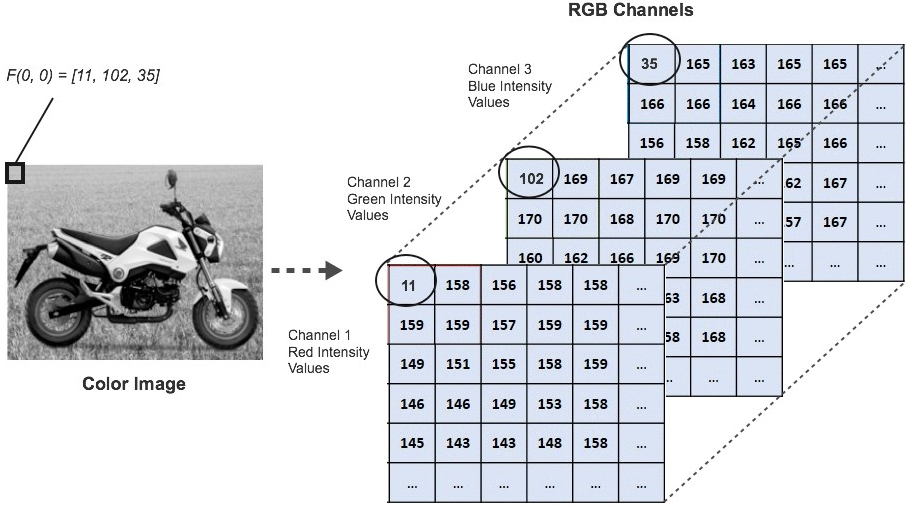

Text(0.5, 1.0, 'Blue Channel')

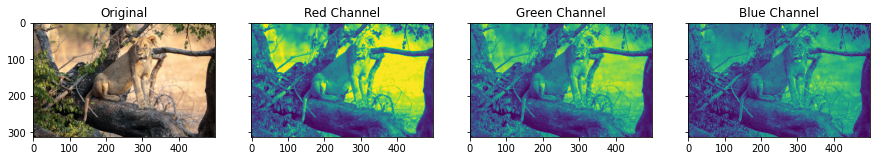

In [3]:
image = io.imread(lion_path[random.randint(0, len(lion_path)-1)])
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
fig.set_figwidth(15)
ax1.imshow(image)
ax1.set_title("Original")
ax2.imshow(image[:,:,0])
ax2.set_title("Red Channel")
ax3.imshow(image[:,:,1])
ax3.set_title("Green Channel")
ax4.imshow(image[:,:,2])
ax4.set_title("Blue Channel")

# Data Preprocessing


### Grayscale Conversion
By converting an image to grayscale, the amount of data stored in each image is significantly reduced, which can help reduce the complexity of machine learning algorithms. However, this may not be practical for certain applications. Examples include medical diagnostic tools, autonomous vehicles, etc. There are various ways to achieve this. The [rgb2gray](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2gray) function utilizes the following to calculate luminescence:
$$  Y = 0.2125 * R + 0.7154 * G + 0.0721 * B$$
Alternatively, you can try out different types of morphological transformations. Erosion shrinks bright regions and englarges dark regions whereas dilation does the exact opposite. Opening is erosion followed by dilation, which can help to "open" gaps. Closing is dilation followed by erosion, which can help to "close" gaps. In order to implement these, a circular disk of a certain size that essentially moves around the image applies the transformation. Both techniques are a part of the [scikit-image](https://scikit-image.org/) package

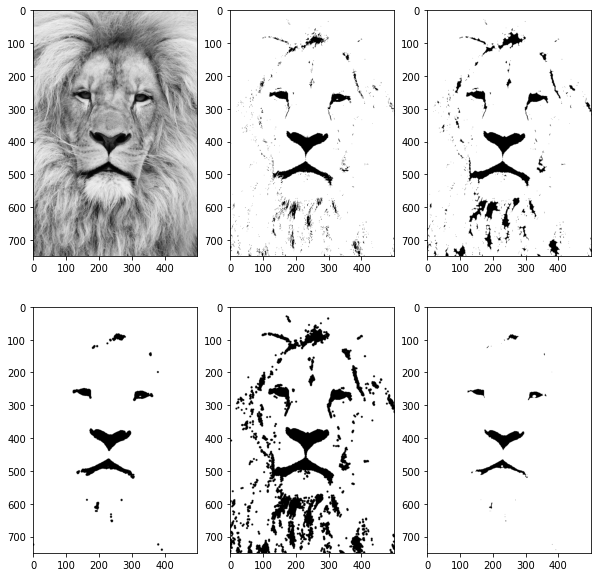

In [ ]:
grayscale_image = color.rgb2gray(image)

# Create a binary image in based on the boolean expression defind below
bin_image = image[:, :, 0] > 125
# use a disk of radius 3
selem = morphology.selem.disk(3)

# oprning and closing
open_img = morphology.binary_opening(bin_image, selem)
close_img = morphology.binary_closing(bin_image, selem)

# erosion and dilation
eroded_img = morphology.binary_erosion(bin_image, selem)
dilated_img = morphology.binary_dilation(bin_image, selem)

fig, axs = plt.subplots(2,3,figsize=(10,10))
axs[0,0].imshow(grayscale_image, cmap='gray')
axs[0,1].imshow(bin_image, cmap='gray')
axs[0,2].imshow(open_img, cmap='gray')
axs[1,0].imshow(close_img, cmap='gray')
axs[1,1].imshow(eroded_img, cmap='gray')
axs[1,2].imshow(dilated_img, cmap='gray')

### Normalization
Normalization is done to re-scale across multiple images so that inconsistencies don't appear due to differences in pixel value rangs and overall number of pixels. Not doing so specifically affects loss calculations and learning rate. 

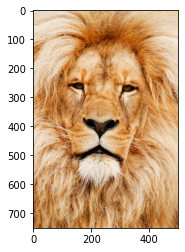

In [ ]:
# Method 1:
norm1_img = image/255

# Method 2:
norm2_img = (image-np.min(image)) / (np.max(image) - np.min(image))

### Data Augmentation

This technique consists of applying minor transformations existing data to increase the diversity of dataset without having to collect new data, which can get very expensive. In addtion, these slight alterations can help remove some of the overfitting that can appear in small image datasets. For instance, it is standard for the subject of the photo be centered. In reality, though, this is an irrelevant feature and the computer should be able to recognize the object of interest even it is slightly off-center.   
  
  The ImageDataGenerator class by Keras is designed to do this in real-time, meaning it will generate augmented images while the model is in the training stage. This ensures that model receives new variations at each epoch. It also requires lower memory usage because the images can be accessed in batches. 

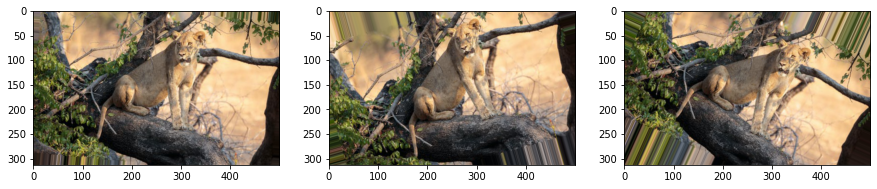

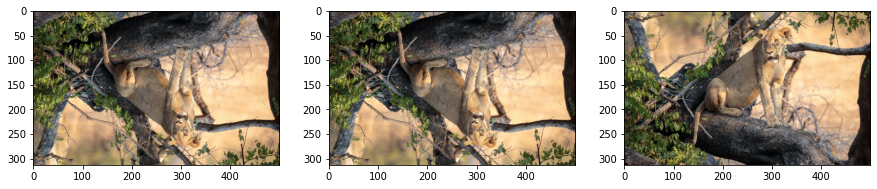

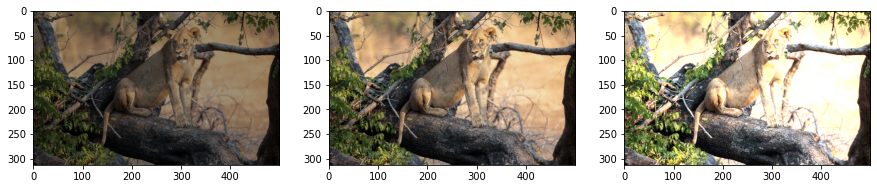

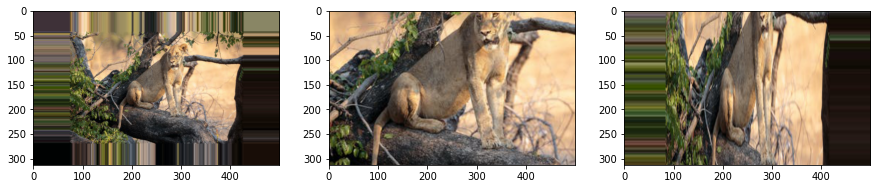

In [4]:
# Converts image data to a numpy array of rank 3
data = img_to_array(image)
# Input data is required to be rank 4, so array is expanded by one dimension
samples = np.expand_dims(image, 0)
# 1. Random Rotations
datagen1 = ImageDataGenerator(rotation_range=30, fill_mode='nearest')
# Create an iterator and figure to display generated images
iter1 = datagen1.flow(np.copy(samples), batch_size=1)
fig1, axs1 = plt.subplots(1,3, figsize=(15,15))
# For loop to generate and display images
for i in range(3):
    # Convert to unsigned integers
    image = next(iter1)[0].astype('uint8')
    axs1[i].imshow(image) 

# 2. Random Flips
datagen2 = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# Create an iterator and figure to display generated images
iter2 = datagen2.flow(np.copy(samples), batch_size=1)
fig2, axs2 = plt.subplots(1,3, figsize=(15,15))
# For loop to generate and display images
for i in range(3):
    # Convert to unsigned integers
    image = next(iter2)[0].astype('uint8')
    axs2[i].imshow(image) 

# 3. Random Brightness
datagen3 = ImageDataGenerator(brightness_range=[0.5,2.0])
# Create an iterator and figure to display generated images
iter3 = datagen3.flow(np.copy(samples), batch_size=1)
fig3, axs3 = plt.subplots(1,3, figsize=(15,15))
# For loop to generate and display images
for i in range(3):
    # Convert to unsigned integers
    image = next(iter3)[0].astype('uint8')
    axs3[i].imshow(image) 


# 4. Random Zoom
datagen4 = ImageDataGenerator(zoom_range=0.5)
# Create an iterator and figure to display generated images
iter4 = datagen4.flow(np.copy(samples), batch_size=1)
fig4, axs4 = plt.subplots(1,3, figsize=(15,15))
# For loop to generate and display images
for i in range(3):
    # Convert to unsigned integers
    image = next(iter4)[0].astype('uint8')
    axs4[i].imshow(image) 

### Image Standardization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


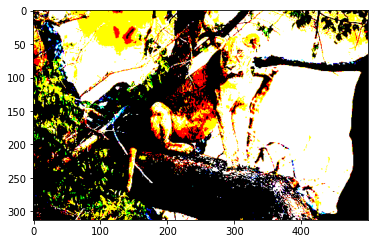

In [7]:
datagen5 = ImageDataGenerator(samplewise_center=True)
standardize = datagen5.standardize(np.copy(data))

plt.imshow(standardize)


# Additional Resources


*   [Getting Started with Image Preprocessing in Python](https://www.section.io/engineering-education/image-preprocessing-in-python/)
*    [TensorFlow ImageDataGenerator Docs](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#used-in-the-notebooks_1)
*  [Data Preprocessing and Network Building in CNN](https://towardsdatascience.com/data-preprocessing-and-network-building-in-cnn-15624ef3a28b)
*   [Setting up the data and the model](https://cs231n.github.io/neural-networks-2/#datapre)